In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:
(x_train,y_train),(x_test,y_test) =  datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
print("Training data shape: ", x_train.shape)
print("Testing data shape: ", x_test.shape)

Training data shape:  (60000, 28, 28)
Testing data shape:  (10000, 28, 28)


In [7]:
#Normalizing the images to the range [0,1]
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


In [8]:
#reshapimg  the data to fit the model (28X28 images with 1 color channel)
x_train = np.expand_dims(x_train, axis=-1) 
x_test = np.expand_dims(x_test, axis=-1)


In [11]:
#Buliding CNN Model
model = models.Sequential([
    #first Convolution Layer
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)), #Reducing Spatial Dimensions
    
    #second Convolution layer
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)), #Reducing Spatial Dimensions Again
    
    #third Convolution layer
    layers.Conv2D(64,(3,3),activation='relu'),
    
    #Flatten the output before feeding to dense Layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),   #Fully Connected Layer
    layers.Dense(10,activation='softmax')  #Output layer for 10 Calsees (digits 0-9)  
])

In [12]:
#Compiling the Model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [14]:
#Traing the model to recognize digits
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4286 - loss: 1.5410 - val_accuracy: 0.9054 - val_loss: 0.3010
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9132 - loss: 0.2762 - val_accuracy: 0.9440 - val_loss: 0.1766
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9437 - loss: 0.1765 - val_accuracy: 0.9580 - val_loss: 0.1287
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9587 - loss: 0.1319 - val_accuracy: 0.9627 - val_loss: 0.1173
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9651 - loss: 0.1081 - val_accuracy: 0.9725 - val_loss: 0.0833


In [15]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9680 - loss: 0.0967


In [16]:
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9725


In [17]:
#predictions on the test set
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


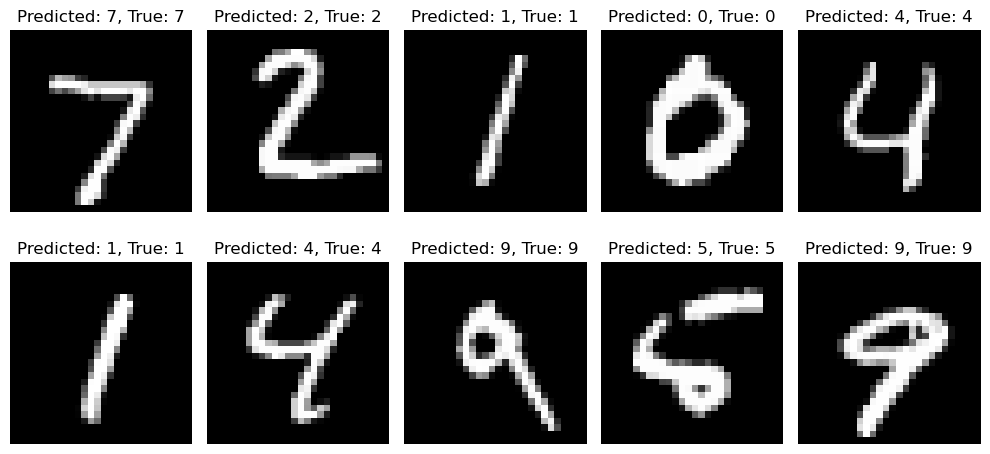

In [21]:
def display_predictions(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(10,5))
    for i in range(num):
        plt.subplot(2,5,i+1)    #2-row ,5-col grid
        plt.imshow(images[i].reshape(28,28),cmap='gray')
        plt.title(f'Predicted: {np.argmax(predicted_labels[i])}, True: {true_labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
display_predictions(x_test,y_test,predictions)
        